In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('heart.csv')
ap = pd.read_csv('heart_copy.csv')

In [3]:
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
ap.head()

,Sex,Cp,Fbs,Restecg,Exng,Caa,Output
0,Boys,asymptomatic,fasting blood sugar,normal,No exercise induced angina,0 major vessels,more chance of heart attack
1,Boys,non-anginal pain,No fasting blood sugar,having ST-T wave abnormality,No exercise induced angina,0 major vessels,more chance of heart attack
2,Girls,atypical angina,No fasting blood sugar,normal,No exercise induced angina,0 major vessels,more chance of heart attack
3,Boys,atypical angina,No fasting blood sugar,having ST-T wave abnormality,No exercise induced angina,0 major vessels,more chance of heart attack
4,Girls,typical angina,No fasting blood sugar,having ST-T wave abnormality,exercise induced angina,0 major vessels,more chance of heart attack


Age : Age of the patient
Sex : Sex of the patient
exang: exercise induced angina (1 = yes; 0 = no)
ca: number of major vessels (0-3)
cp : Chest Pain type chest pain type
Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)
chol : cholestoral in mg/dl fetched via BMI sensor
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
rest_ecg : resting electrocardiographic results
Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved
target : 0= less chance of heart attack 1= more chance of heart attack



In [59]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Figure size 1500x1000 with 0 Axes>

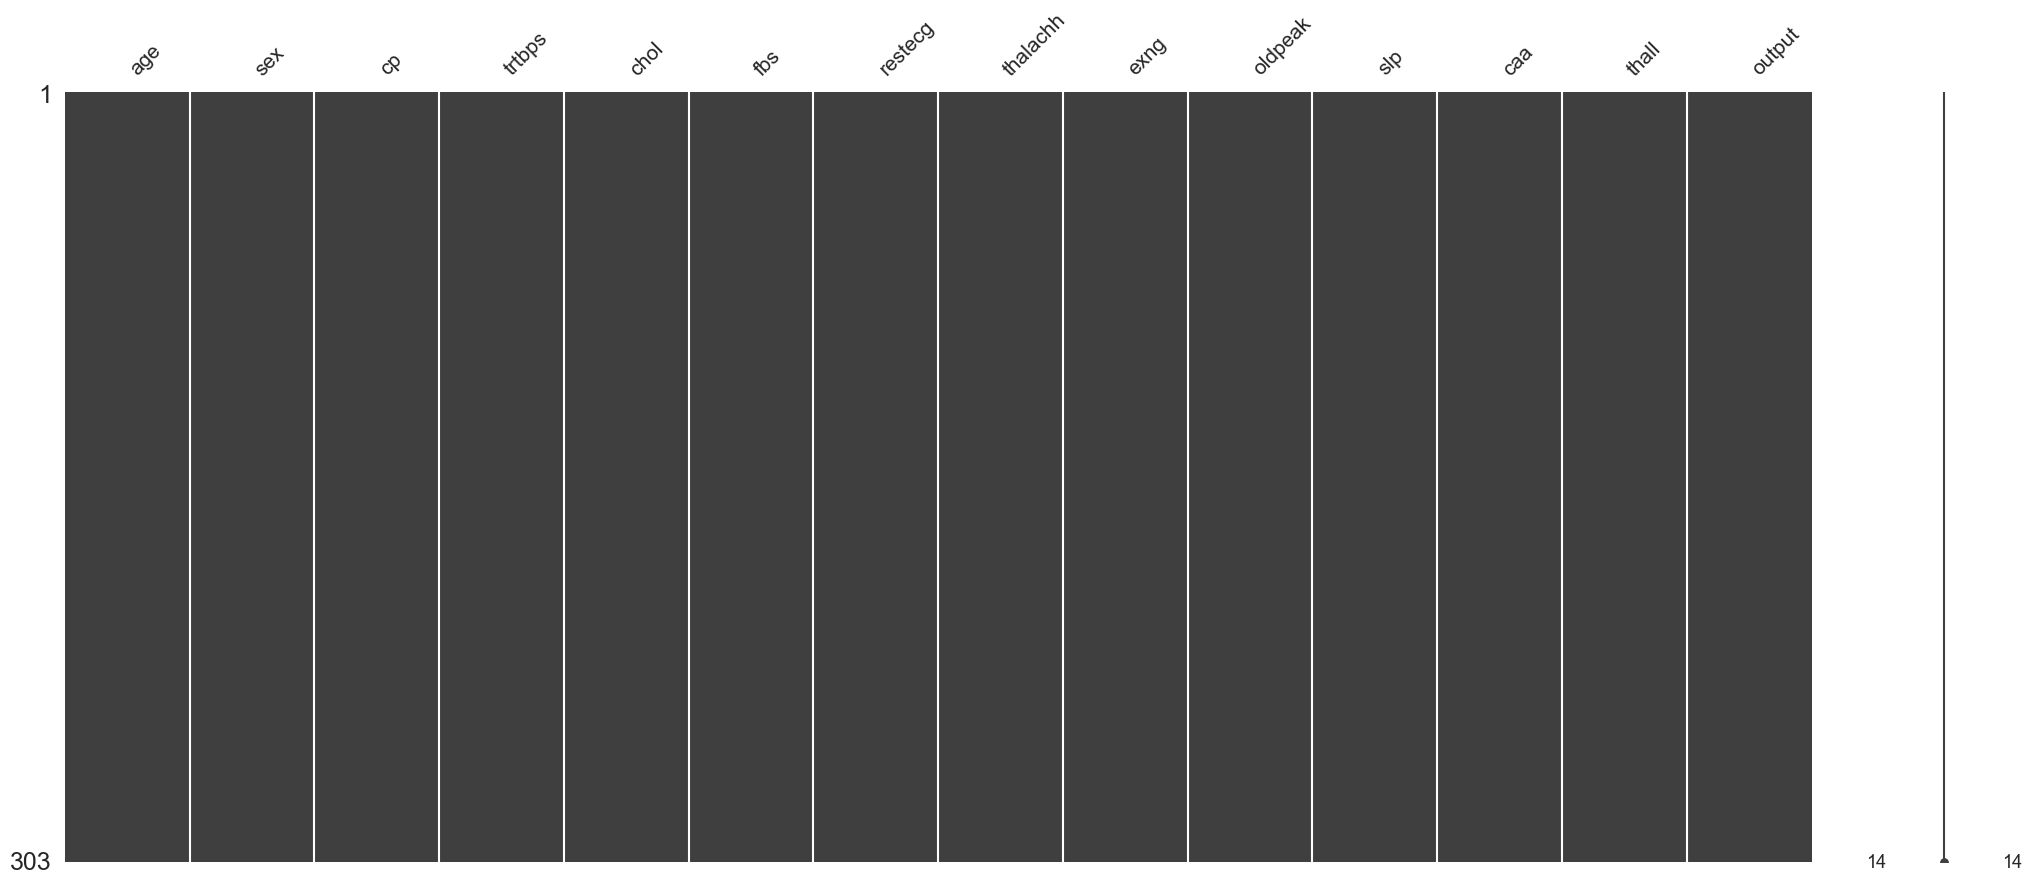

In [60]:
plt.figure(figsize=(15,10))
missingno.matrix(data, fontsize = 15)
plt.show()

In [61]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


[Text(0.5, 1.0, 'output')]

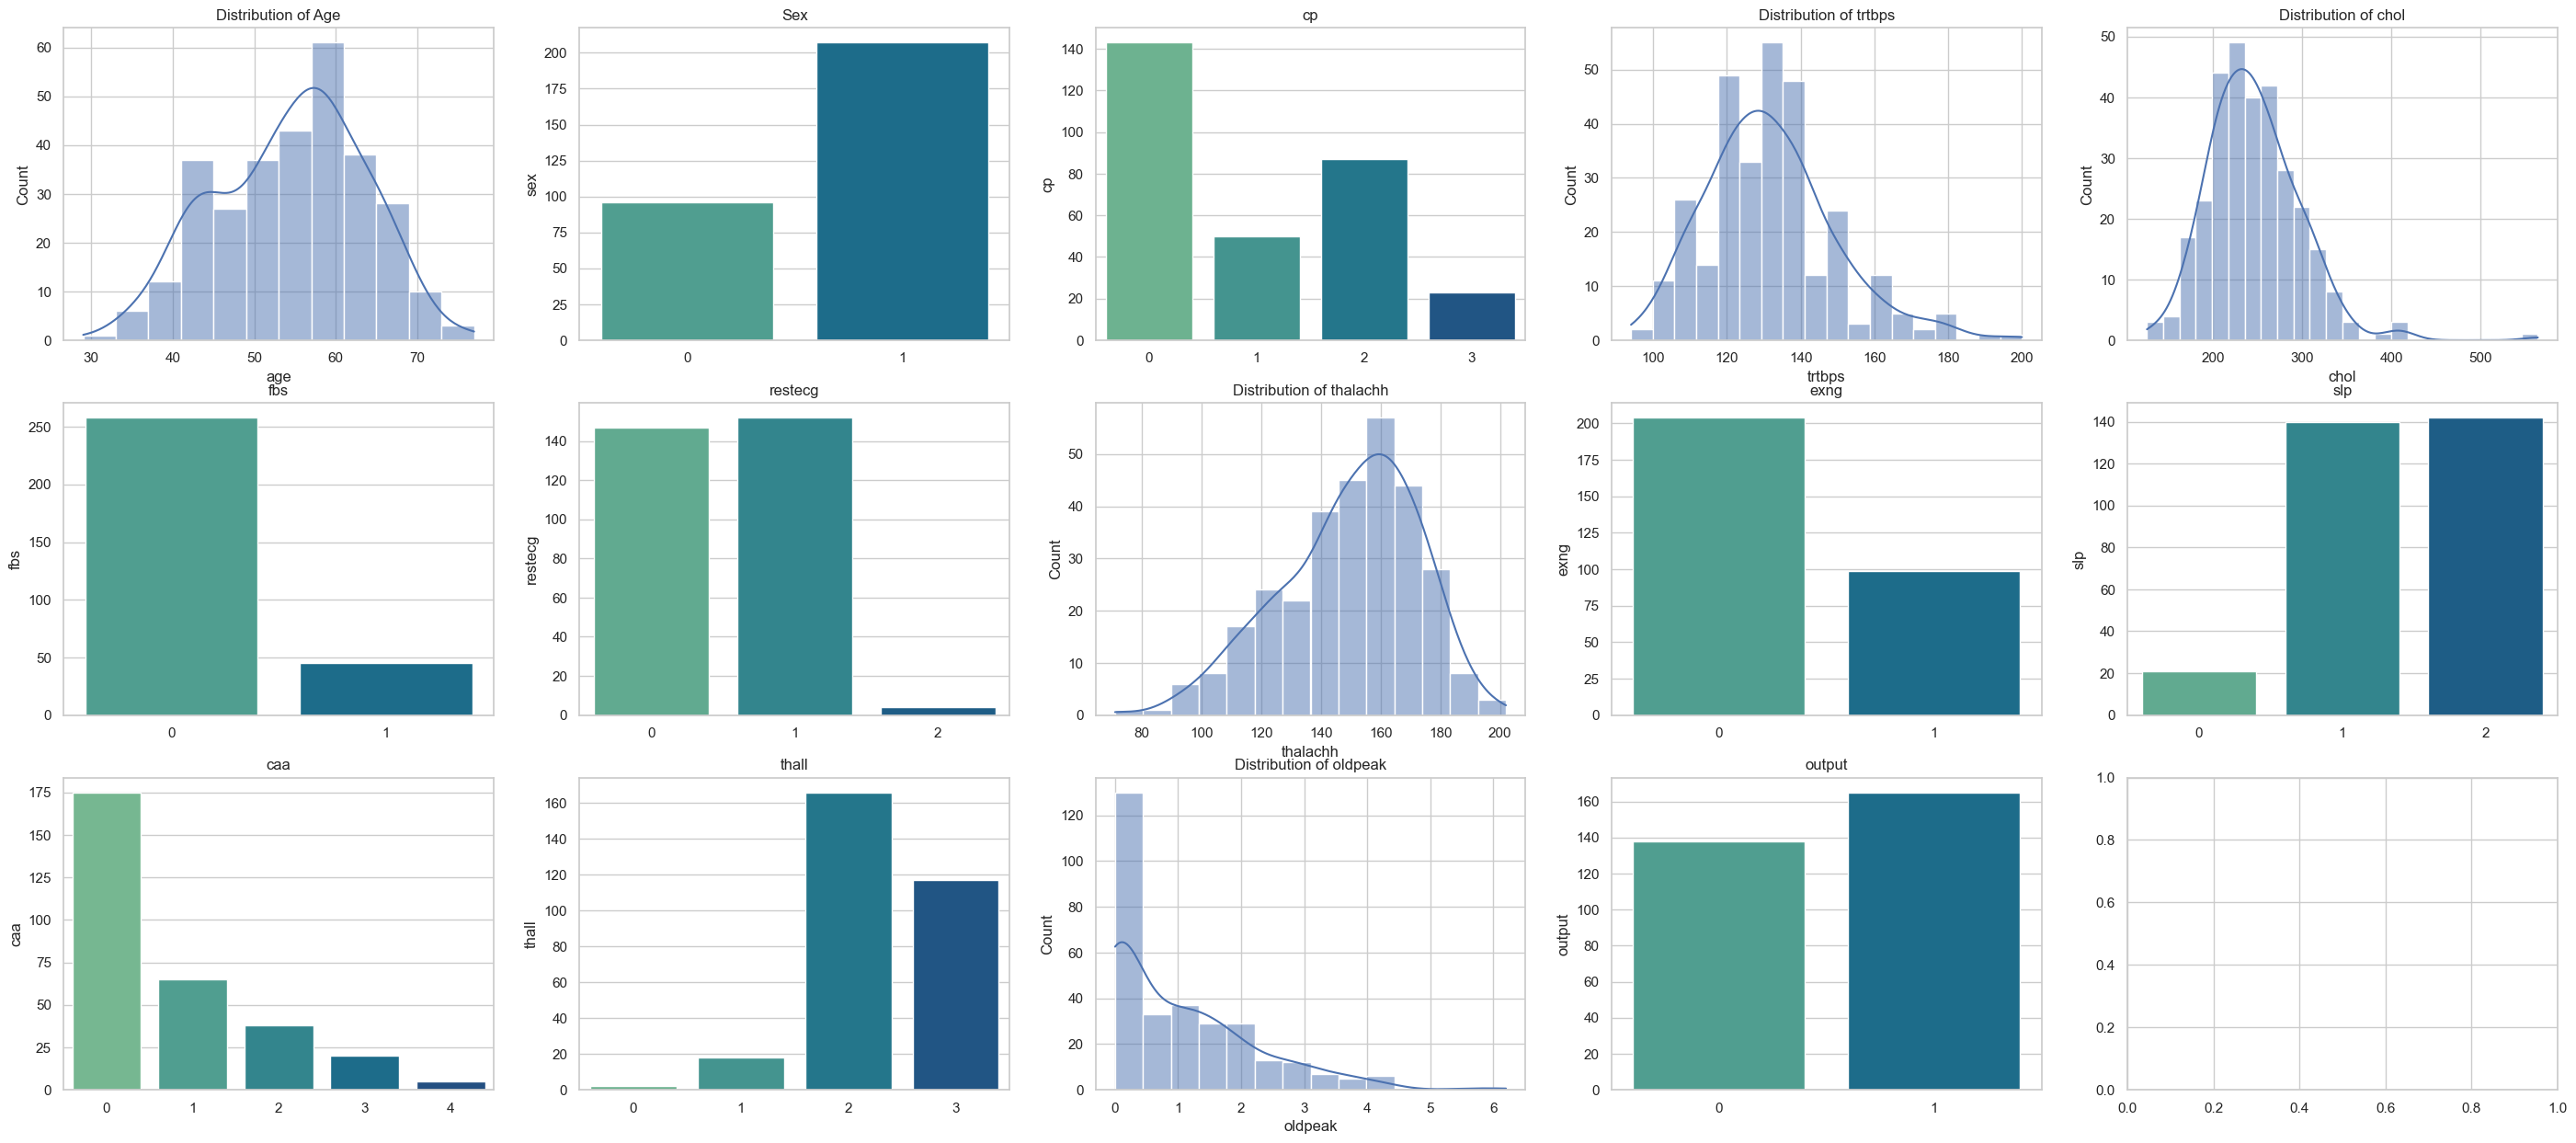

In [62]:
fig, axes = plt.subplots(3, 5, figsize = (35, 15))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")

sns.histplot(ax=axes[0],x=data["age"], kde=True,palette="crest").set_title(f"Distribution of Age");

sns.barplot(ax = axes[1], x = data["sex"].value_counts().index,
            y = data["sex"].value_counts(),palette="crest",
            data = data, saturation = 1).set(title = "Sex");

sns.barplot(ax = axes[2], x = data["cp"].value_counts().index,
            y = data["cp"].value_counts(),
            data = data, saturation = 1,palette="crest").set(title = "cp")

sns.histplot(ax=axes[3],x=data["trtbps"], kde=True,palette="crest").set_title(f"Distribution of trtbps");

sns.histplot(ax=axes[4],x=data["chol"], kde=True,palette="crest").set_title(f"Distribution of chol");

sns.barplot(ax = axes[5], x = data["fbs"].value_counts().index,
            y = data["fbs"].value_counts(),
            data = data, saturation = 1, palette="crest").set(title = "fbs")

sns.barplot(ax = axes[6], x = data["restecg"].value_counts().index,
            y = data["restecg"].value_counts(),
            data = data, saturation = 1,palette="crest").set(title = "restecg")

sns.histplot(ax=axes[7],x=data["thalachh"], kde=True,palette="crest").set_title(f"Distribution of thalachh");

sns.barplot(ax = axes[8], x = data["exng"].value_counts().index,
            y = data["exng"].value_counts(),
            data = data, saturation = 1,palette="crest").set(title = "exng")

sns.barplot(ax = axes[9], x = data["slp"].value_counts().index,
            y = data["slp"].value_counts(),
            data = data, saturation = 1, palette="crest").set(title = "slp")

sns.barplot(ax = axes[10], x = data["caa"].value_counts().index,
            y = data["caa"].value_counts(),
            data = data, saturation = 1,palette="crest").set(title = "caa")

sns.barplot(ax = axes[11], x = data["thall"].value_counts().index,
            y = data["thall"].value_counts(),
            data = data, saturation = 1,palette="crest").set(title = "thall")

sns.histplot(ax=axes[12],x=data["oldpeak"], kde=True,palette="crest").set_title(f"Distribution of oldpeak");

sns.barplot(ax = axes[13], x = data["output"].value_counts().index,
            y = data["output"].value_counts(),
            data = data, saturation = 1,palette="crest").set(title = "output")



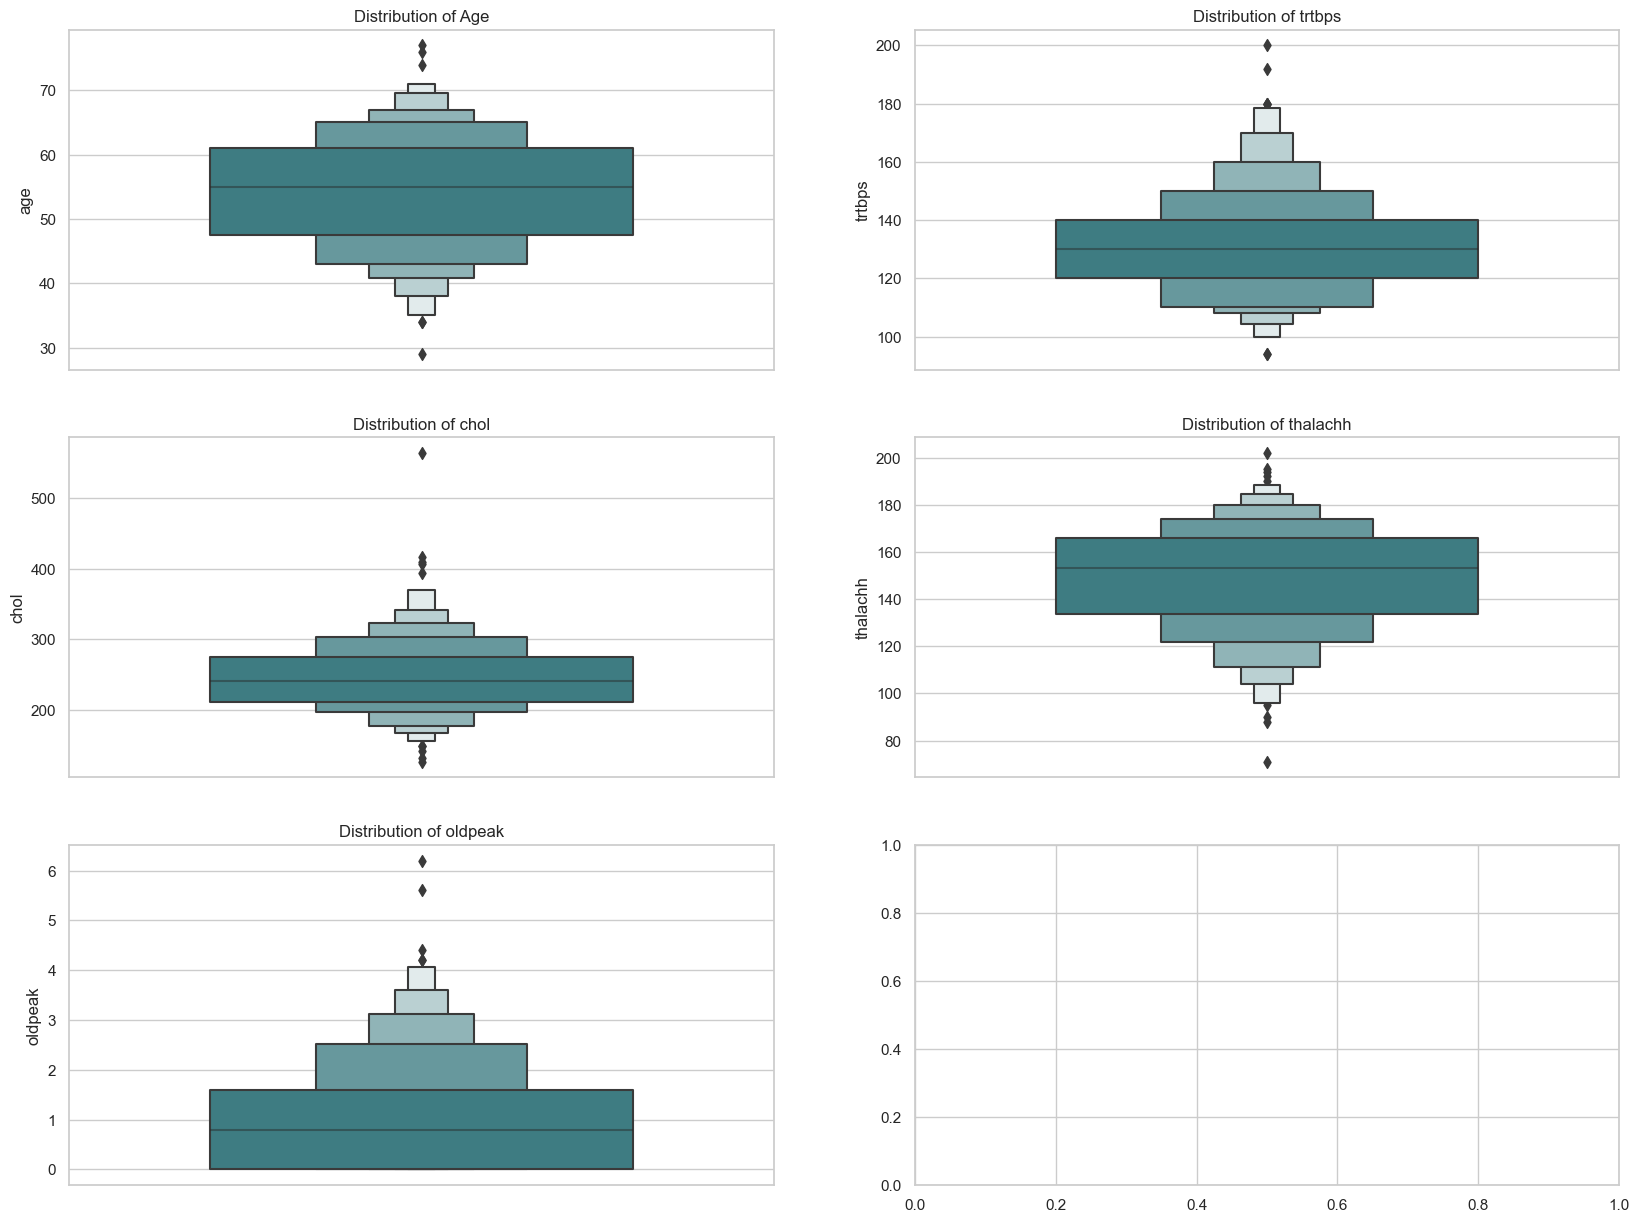

In [63]:
fig, axes = plt.subplots(3, 2, figsize = (20, 15))
sns.set_theme(style = "whitegrid")
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.boxenplot(ax=axes[0],y=data['age'],palette="crest",width=0.6).set_title(f"Distribution of Age");
sns.boxenplot(ax=axes[1],y=data['trtbps'],palette="crest",width=0.6).set_title(f"Distribution of trtbps");
sns.boxenplot(ax=axes[2],y=data['chol'],palette="crest",width=0.6).set_title(f"Distribution of chol");
sns.boxenplot(ax=axes[3],y=data['thalachh'],palette="crest",width=0.6).set_title(f"Distribution of thalachh");
sns.boxenplot(ax=axes[4],y=data['oldpeak'],palette="crest",width=0.6).set_title(f"Distribution of oldpeak");


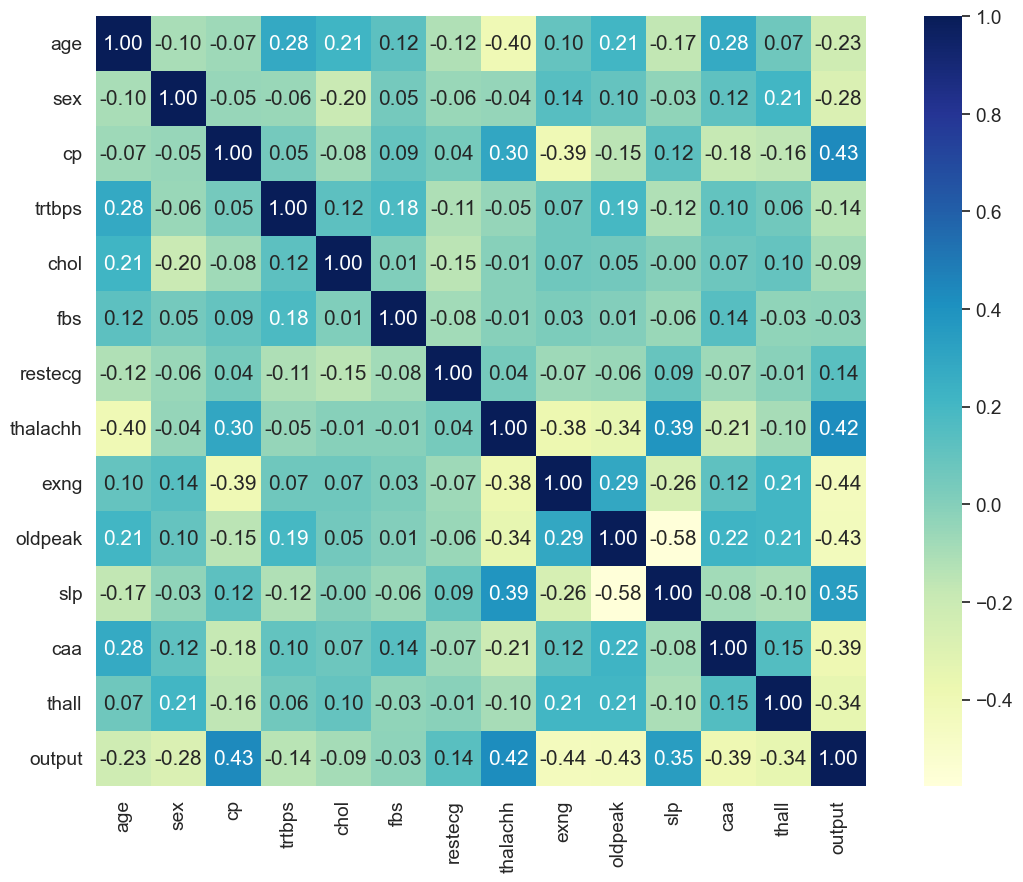

In [64]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.25) 
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f',cmap="YlGnBu")
plt.show()


Text(0.5, 1.0, 'Density between age and output')

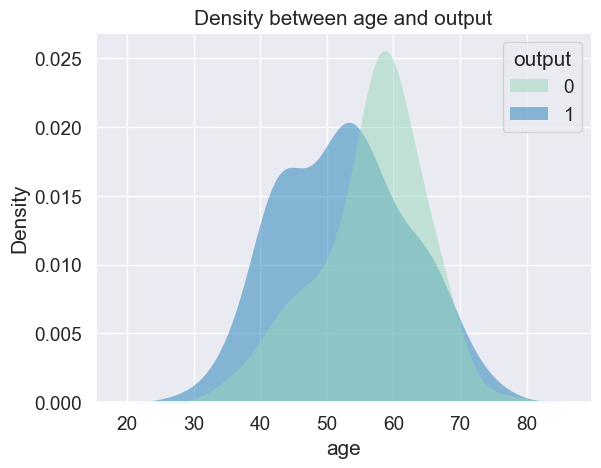

In [65]:
sns.kdeplot( data=data, x='age',hue="output", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between age and output")

Text(0.5, 1.0, 'Corrleation between cp and output')

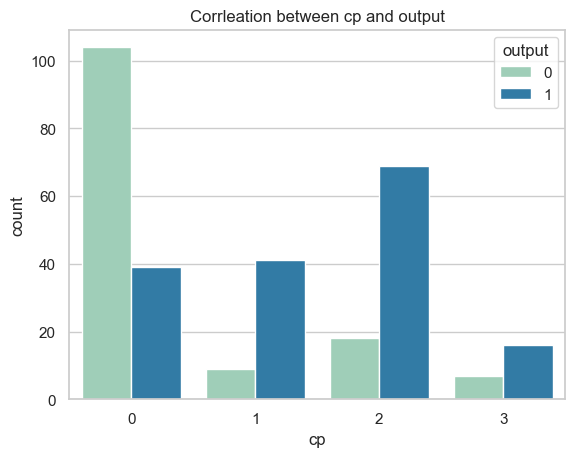

In [66]:
sns.set_theme(style = "whitegrid")
sns.countplot(x=data["cp"],hue=data['output'],palette='YlGnBu').set_title(f"Corrleation between cp and output")

Text(0.5, 1.0, 'Density between thalachh and output')

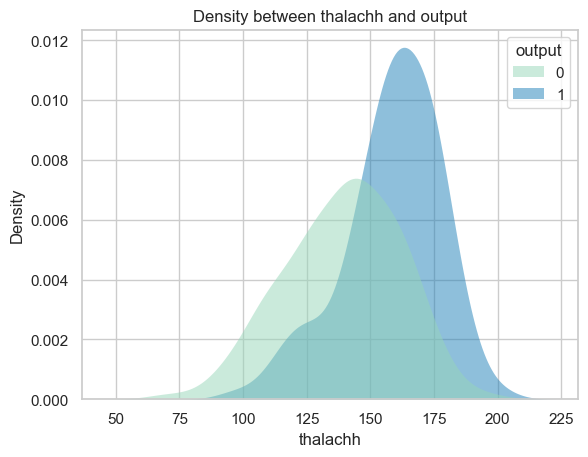

In [67]:
sns.kdeplot(data=data, x="thalachh",hue="output", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between thalachh and output")

Text(0.5, 1.0, 'Corrleation between exng and output')

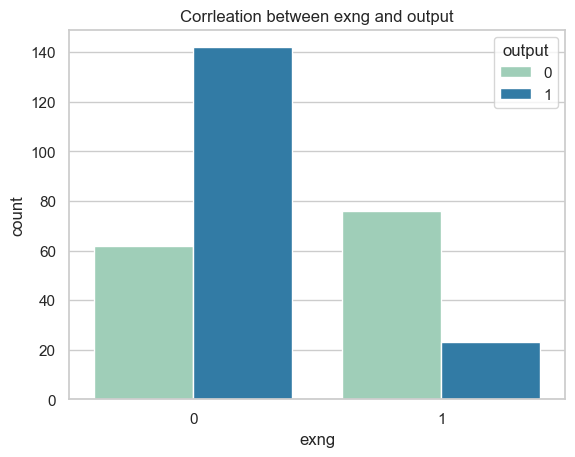

In [68]:
sns.set_theme(style = "whitegrid")
sns.countplot(x=data["exng"],hue=data['output'],palette='YlGnBu').set_title(f"Corrleation between exng and output")

Text(0.5, 1.0, 'Density between oldpeak and output')

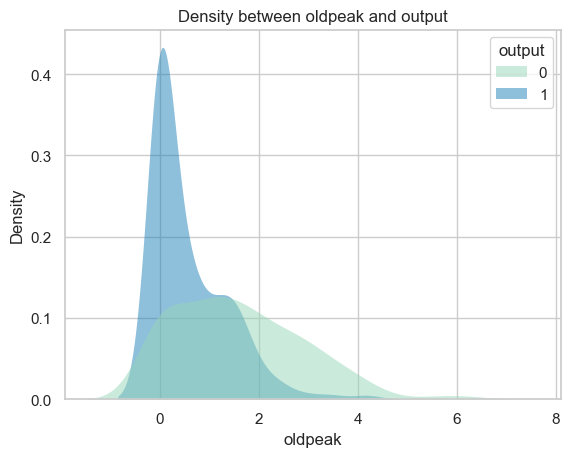

In [69]:
sns.kdeplot(data=data, x="oldpeak",hue="output", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between oldpeak and output")

Text(0.5, 1.0, 'Density between slp and output')

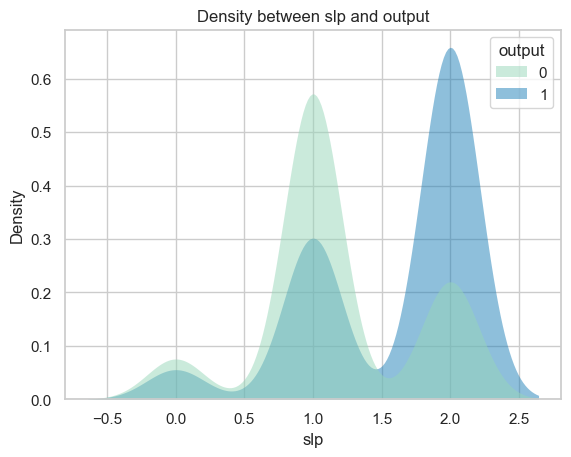

In [70]:
sns.kdeplot(data=data, x="slp",hue="output", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between slp and output")

Text(0.5, 1.0, 'Density between caa and output')

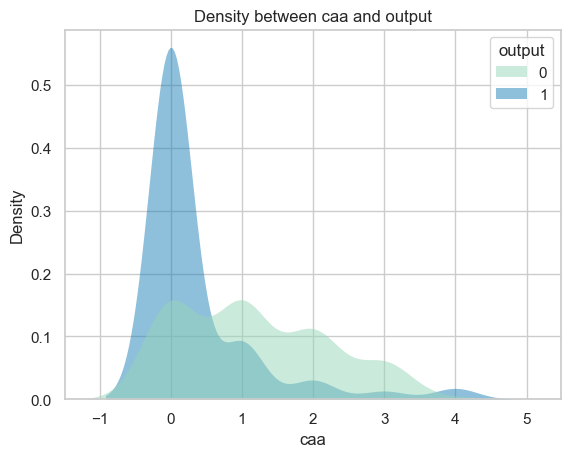

In [71]:
sns.kdeplot(data=data, x="caa",hue="output", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between caa and output")

Text(0.5, 1.0, 'Density between thall and output')

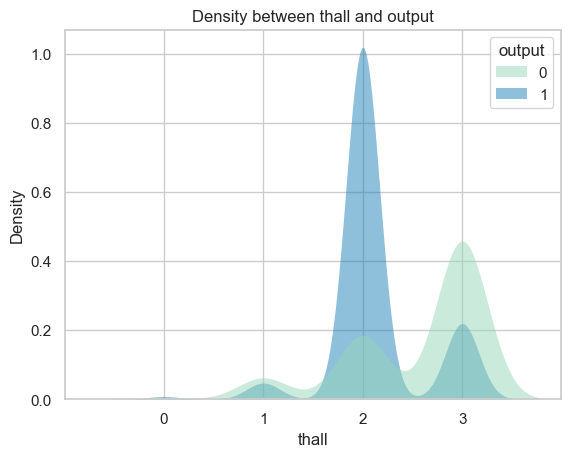

In [72]:
sns.kdeplot(data=data, x="thall",hue="output", fill=True,palette='YlGnBu', alpha=.5, linewidth=0).set_title(f"Density between thall and output")

In [73]:
ap_df = ap.T.reset_index(drop=True).T
ap_df = ap_df.to_numpy()
te = TransactionEncoder()
te_ary = te.fit(ap_df).transform(ap_df)
apap_df = pd.DataFrame(te_ary, columns=te.columns_)


In [74]:
ap

,Sex,Cp,Fbs,Restecg,Exng,Caa,Output
0,Boys,asymptomatic,fasting blood sugar,normal,No exercise induced angina,0 major vessels,more chance of heart attack
1,Boys,non-anginal pain,No fasting blood sugar,having ST-T wave abnormality,No exercise induced angina,0 major vessels,more chance of heart attack
2,Girls,atypical angina,No fasting blood sugar,normal,No exercise induced angina,0 major vessels,more chance of heart attack
3,Boys,atypical angina,No fasting blood sugar,having ST-T wave abnormality,No exercise induced angina,0 major vessels,more chance of heart attack
4,Girls,typical angina,No fasting blood sugar,having ST-T wave abnormality,exercise induced angina,0 major vessels,more chance of heart attack
...,...,...,...,...,...,...,...
298,Girls,typical angina,No fasting blood sugar,having ST-T wave abnormality,exercise induced angina,0 major vessels,less chance of heart attack
299,Boys,asymptomatic,No fasting blood sugar,having ST-T wave abnormality,No exercise induced angina,0 major vessels,less chance of heart attack
300,Boys,typical angina,fasting blood sugar,having ST-T wave abnormality,No exercise induced angina,2 major vessels,less chance of heart attack
301,Boys,typical angina,No fasting blood sugar,having ST-T wave abnormality,exercise induced angina,1 major vessels,less chance of heart attack


In [75]:
frequent_itemsets = apriori(apap_df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length']==2)&(frequent_itemsets['support']>=0.4)]

,support,itemsets,length
15,0.432343,"(0 major vessels, No exercise induced angina)",2
16,0.511551,"(0 major vessels, No fasting blood sugar)",2
18,0.429043,"(0 major vessels, more chance of heart attack)",2
21,0.429043,"(No exercise induced angina, Boys)",2
22,0.574257,"(Boys, No fasting blood sugar)",2
32,0.577558,"(No exercise induced angina, No fasting blood ...",2
35,0.468647,"(No exercise induced angina, more chance of he...",2
40,0.438944,"(No fasting blood sugar, having ST-T wave abno...",2
42,0.468647,"(No fasting blood sugar, more chance of heart ...",2
45,0.412541,"(No fasting blood sugar, typical angina)",2


In [76]:
frequent_itemsets = apriori(apap_df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length']==2)&(frequent_itemsets['support']>=0.5)]

,support,itemsets,length
16,0.511551,"(0 major vessels, No fasting blood sugar)",2
22,0.574257,"(Boys, No fasting blood sugar)",2
32,0.577558,"(No exercise induced angina, No fasting blood ...",2


In [77]:
frequent_itemsets = apriori(apap_df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[(frequent_itemsets['length']==2)&(frequent_itemsets['support']>=0.55)]

,support,itemsets,length
22,0.574257,"(Boys, No fasting blood sugar)",2
32,0.577558,"(No exercise induced angina, No fasting blood ...",2


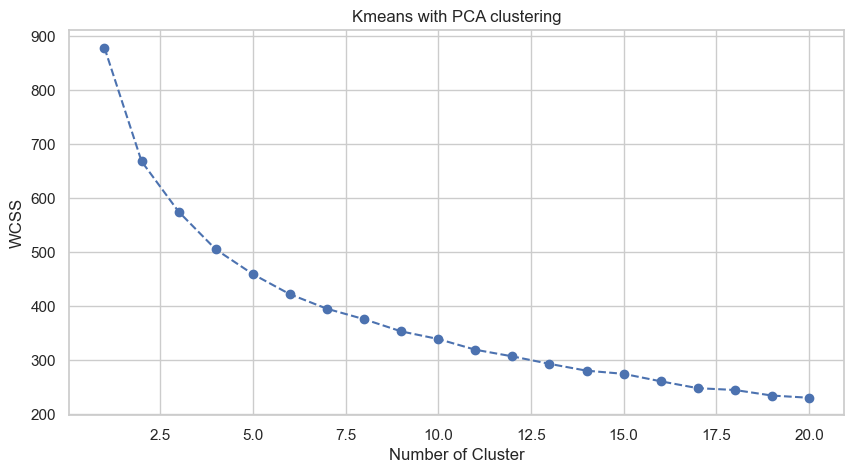

In [78]:
kmeans_data = data[['age','trtbps','chol','thalachh','oldpeak']]
scaler_st = RobustScaler()
X_std = scaler_st.fit_transform(kmeans_data)
pca = PCA()
pca.fit(X_std)
scores_pca=pca.transform(X_std)
wcss=[]
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters= i, init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,21),wcss,marker='o',linestyle ='--')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA clustering')
plt.show()

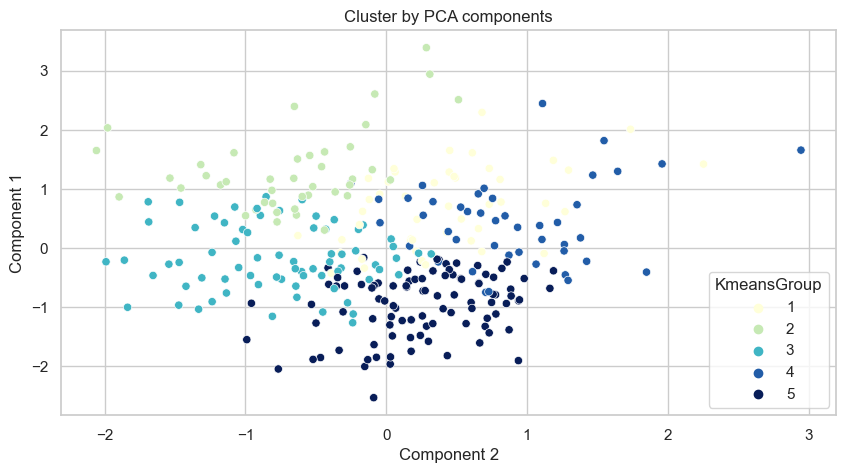

In [79]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)
pcadf = pd.DataFrame(scores_pca)
df_x_pca_kmeans = pd.concat([data.reset_index(drop=True),pcadf],axis=1)
df_x_pca_kmeans.columns.values[-5:]=['Component 1','Component 2','Component 3','Component 4','Component 5']
df_x_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_x_pca_kmeans['KmeansGroup'] = df_x_pca_kmeans['Segment K-means PCA']
df_x_pca_kmeans['KmeansGroup'] = df_x_pca_kmeans['KmeansGroup'] +1
x_axis = df_x_pca_kmeans['Component 2']
y_axis = df_x_pca_kmeans['Component 1']
plt.figure(figsize=(10,5))
hue_order=[1,2,3,4,5]
sns.scatterplot(x=x_axis,y=y_axis, hue = df_x_pca_kmeans['KmeansGroup'],hue_order=hue_order,palette='YlGnBu')
plt.title('Cluster by PCA components')
plt.show()

In [80]:
kmeans_data['KmeansGroup'] = df_x_pca_kmeans['KmeansGroup']
kmeans_data['output'] = data['output']
kmeans_data.groupby(['KmeansGroup']).mean()

,age,trtbps,chol,thalachh,oldpeak,output
KmeansGroup,,,,,,
1,59.574468,153.340426,241.468085,154.744681,0.565957,0.595745
2,61.046512,146.279070,243.209302,131.790698,2.888372,0.139535
3,57.732394,118.802817,226.788732,130.859155,1.183099,0.422535
4,56.613636,131.022727,327.886364,153.931818,0.984091,0.522727
5,45.489796,124.336735,227.367347,166.724490,0.376531,0.795918


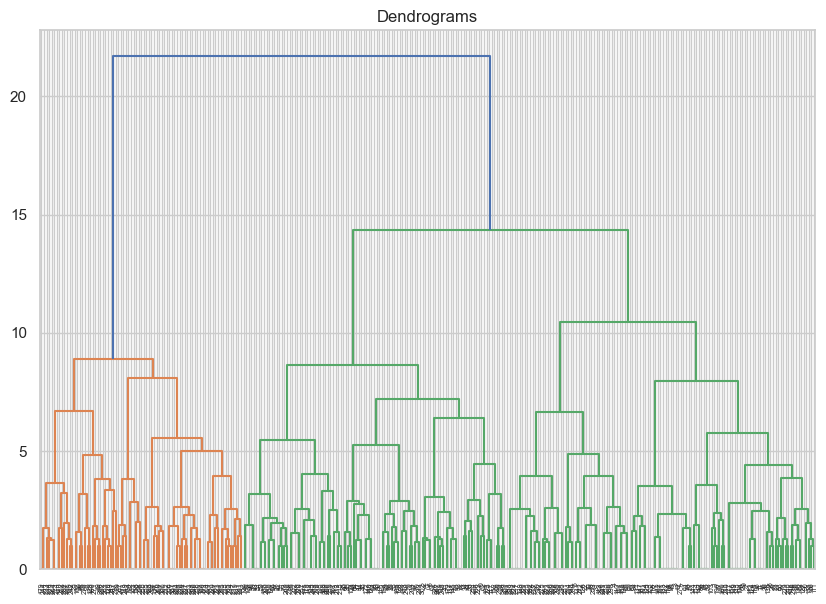

In [81]:
temp1 = pd.get_dummies(data['cp'])
temp1.columns = ['typical angina', 'atypical angina', 'non-anginal pain','asymptomatic']
temp2 = pd.get_dummies(data['restecg'])
temp2.columns = ['normal', 'having ST-T wave abnormality','showing probable or definite left ventricular hypertrophy by Estes']
data = pd.concat([data,temp1,temp2],axis=1)
data = data.drop(columns=['cp','restecg'],axis=1)
data = data[['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak','slp', 'caa', 'thall','typical angina', 'atypical angina','non-anginal pain', 'asymptomatic', 'normal','having ST-T wave abnormality','showing probable or definite left ventricular hypertrophy by Estes','output']]
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
hier_data = data[['sex','fbs','exng','slp','caa','thall','typical angina', 'atypical angina', 'non-anginal pain','asymptomatic','normal', 'having ST-T wave abnormality','showing probable or definite left ventricular hypertrophy by Estes']]
dend = shc.dendrogram(shc.linkage(hier_data, method='ward'))

In [82]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hier_data['HierarchyGroup'] = cluster.fit_predict(hier_data)
hier_data['HierarchyGroup'] = hier_data['HierarchyGroup'] + 1
hier_data['output'] = data['output']
hier_data.groupby(['HierarchyGroup']).agg(pd.Series.mode)

,sex,fbs,exng,slp,caa,thall,typical angina,atypical angina,non-anginal pain,asymptomatic,normal,having ST-T wave abnormality,showing probable or definite left ventricular hypertrophy by Estes,output
HierarchyGroup,,,,,,,,,,,,,,
1,1,0,0,2,0,2,0,0,0,0,0,1,0,1
2,1,0,1,1,2,3,1,0,0,0,1,0,0,0
3,1,0,0,1,0,2,0,0,0,0,1,0,0,1


In [67]:
X=data.iloc[:,:-1]
y=data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = MinMaxScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)


In [68]:
X_train

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,typical angina,atypical angina,non-anginal pain,asymptomatic,normal,having ST-T wave abnormality,showing probable or definite left ventricular hypertrophy by Estes
0,0.666667,1.0,0.469388,0.175520,0.0,0.438596,1.0,0.306452,1.0,0.25,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.687500,1.0,0.265306,0.314088,0.0,0.096491,1.0,0.290323,0.5,0.50,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.333333,1.0,0.102041,0.177829,0.0,0.526316,1.0,0.483871,0.5,0.00,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.770833,0.0,0.571429,0.219400,0.0,0.228070,0.0,0.419355,0.0,0.00,0.666667,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.708333,1.0,0.367347,0.284065,0.0,0.517544,0.0,0.225806,0.5,0.25,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.437500,1.0,0.469388,0.235566,0.0,0.657895,0.0,0.096774,0.5,0.25,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
268,0.458333,1.0,0.000000,0.221709,0.0,0.578947,1.0,0.000000,1.0,0.25,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0
269,0.833333,1.0,0.673469,0.237875,1.0,0.377193,0.0,0.016129,0.5,0.25,0.666667,0.0,0.0,0.0,1.0,1.0,0.0,0.0
270,0.354167,1.0,0.265306,0.272517,0.0,0.491228,0.0,0.129032,1.0,0.00,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
logr = LogisticRegression()
param_grid_logr = [
    {'penalty':['l1','l2','elasticnet','none'],
    'dual':[True,False],
    'fit_intercept':[True,False],
    'C':[0.001, 0.01, 0.05, 0.1],
    'class_weight':[dict,'balanced'],
    'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,500,1000],
    'multi_class':['auto','ovr','multinomial'],
    'warm_start':[True,False]
    }
]
param_logr = GridSearchCV(logr, param_grid = param_grid_logr, cv = 5, verbose=True,scoring="f1")
best_param_logr = param_logr.fit(X_train,y_train)
best_param_logr.best_params_

Fitting 5 folds for each of 11520 candidates, totalling 57600 fits


{'C': 0.1,
 'class_weight': dict,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'lbfgs',
 'warm_start': True}

In [56]:
logr = LogisticRegression(C = 0.1 , class_weight = 'dict', dual = False, fit_intercept = True, max_iter = 100, multi_class = 'auto', penalty= 'l2', solver= 'lbfgs', warm_start = True)
logr.fit(X_train,y_train)
logr_Prediction = logr.predict(X_test)

In [69]:
svm = SVC()
param_grid_svm = [
    {
    'kernel':['linear', 'rbf', 'sigmoid'],
    'gamma':['scale', 'auto'],
    'class_weight':['dict' , 'balanced'],
    'decision_function_shape':['ovo', 'ovr'],
    'probability':[True,False],
    'shrinking':[True,False],
    'verbose':[True,False]
    }
]
param_svm = GridSearchCV(svm, param_grid = param_grid_svm, cv = 5, verbose=True,scoring="f1")
best_param_svm = param_svm.fit(X_train,y_train)
best_param_svm.best_params_

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'shrinking': True,
 'verbose': True}

In [70]:
svm = SVC(kernel='rbf',class_weight='balanced',decision_function_shape='ovo',gamma='scale',probability=True,shrinking=True,verbose=True)
svm.fit(X_train, y_train)
svm_Prediction = svm.predict(X_test)

[LibSVM]

In [74]:
gb = GradientBoostingClassifier()
param_grid_gb = [
    {
    'loss':['log_loss', 'deviance', 'exponential'],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[100,200,400,600,800],
    'subsample':[0.0,0.5,1],
    'criterion':['friedman_mse', 'squared_error', 'mse'],
    'max_features':['auto', 'sqrt', 'log2'],
    'init':['estimator','zero'],

    }
]
param_gb = GridSearchCV(gb, param_grid = param_grid_gb, cv = 5, verbose=True,scoring="f1")
best_param_gb = param_gb.fit(X_train,y_train)
best_param_gb.best_params_


Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


{'criterion': 'squared_error',
 'init': 'zero',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_features': 'sqrt',
 'n_estimators': 600,
 'subsample': 0.5}

In [75]:
gb_Model = GradientBoostingClassifier(criterion = 'squared_error',init='zero',learning_rate=0.01, loss='deviance',max_features='sqrt',n_estimators=600,subsample=0.5,random_state=42)
gb_Model.fit(X_train, y_train)
gb_Prediction = gb_Model.predict(X_test)

In [76]:
print("The accuracy score of logisitc regression is:",accuracy_score(y_test,logr_Prediction))
print("The accuracy score of gradient boosting is:",accuracy_score(y_test,gb_Prediction))
print("The accuracy score of support vector machine is:",accuracy_score(y_test,svm_Prediction))

The accuracy score of logisitc regression is: 0.7741935483870968
The accuracy score of gradient boosting is: 0.8064516129032258
The accuracy score of support vector machine is: 0.8064516129032258
